In [1]:
import pandas as pd
from datetime import datetime

In [264]:
data = pd.read_csv('bank_transactions.csv')
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [265]:
data.shape

(1048567, 9)

In [266]:
# drop all missing values - they are not that many 
data.dropna(inplace=True)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [268]:
# handling dates
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [269]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


<AxesSubplot:>

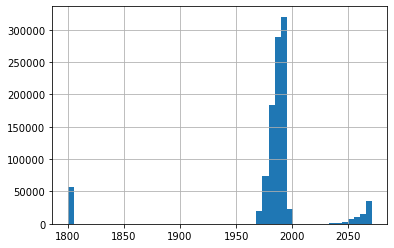

In [271]:
data.CustomerDOB.dt.year.hist(bins=50)

In [272]:
# shift the date of births with 100 to the left (for those with a DOB year > 2000)
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)
# drop the customers that have year = 1800
data.drop(data[data.CustomerDOB.dt.year == 1800].index, axis=0, inplace=True)

<AxesSubplot:>

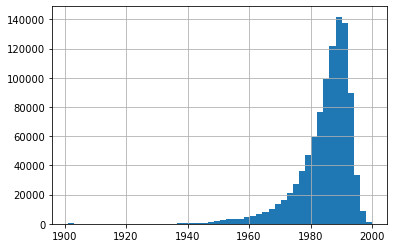

In [273]:
data.CustomerDOB.dt.year.hist(bins=50)

In [274]:
# handling times
# data.TransactionTime = data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S').time())
# we want to keep it as an integer for the MinHash

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            985322 non-null  object        
 1   CustomerID               985322 non-null  object        
 2   CustomerDOB              985322 non-null  datetime64[ns]
 3   CustGender               985322 non-null  object        
 4   CustLocation             985322 non-null  object        
 5   CustAccountBalance       985322 non-null  float64       
 6   TransactionDate          985322 non-null  datetime64[ns]
 7   TransactionTime          985322 non-null  int64         
 8   TransactionAmount (INR)  985322 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 75.2+ MB


In [276]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [292]:
# create new dataset that keeps only some of the features
# we drop TransactionID and CustomerID
data_small = data.iloc[:,2:]

In [293]:
data_small.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [348]:
# a hash function that converts all values in the dataframe to integers

def hash_func(variable):
    if isinstance(variable, pd._libs.tslibs.timestamps.Timestamp):
        return variable.year*10000 + variable.month*100 + variable.day
    elif isinstance(variable, float):
        return int(variable)
    elif isinstance(variable, str):
        return hash_string(variable)
    return variable

In [349]:
import string
import re

# function that converts a string to an integer
def hash_string(var):
    m = 2**32
    p = 31
    s = 0
    
    for i in range(len(var)):
        s += ord(var[i])*(p**i)
        
    return s % m

In [283]:
# the features present in the dataframe
features = data_small.columns
features

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [329]:
from scipy.spatial.distance import cosine
from random import randint
import numpy as np

# specify the length of each minhash vector
N = data_small.shape[1]
max_val = (2**32)-1

# create N tuples that will serve as permutation functions
# these permutation values are used to hash all input sets
perms = [ (randint(0,max_val), randint(0,max_val)) for i in range(N)]
print(perms)


def minhash(s, df, prime=125539):
    '''
    Given a set `s`, pass each member of the set through all permutation
    functions, and set the `ith` position of `vec` to the `ith` permutation
    function's output if that output is smaller than `vec[i]`.
    '''
    # initialize a minhash of length N with positive infinity values
    vec = [float('inf') for i in range(N)]

    for i, val in enumerate(df):

        # ensure s is composed of integers
        values = hash_func(df[val][0])

        # loop over each "permutation function"
        for perm_vals in perms:
            a, b = perm_vals

            # pass `val` through the `ith` permutation function
            output = (a * values + b) % prime
            #print(output)
            # conditionally update the `ith` value of vec
            if vec[i] > output:
                vec[i] = output

    # the returned vector represents the minimum hash of the set s
    print(vec)

[(2385138576, 394896392), (2721706177, 3749405473), (2382944077, 779865609), (2777674126, 3808366256), (823618602, 847860188), (458797101, 943783641), (2118911511, 68158542)]


In [382]:
df = data.iloc[0:1,2:]
df['minhash'] = df.apply(lambda row: minhash(row,df, prime=125539))
df

ValueError: Expected a 1D array, got an array with shape (1, 7)

In [370]:
N = data_small.shape[1]
max_val = (2**32)-1
perms = [ (randint(0,max_val), randint(0,max_val)) for i in range(N)]
vec = [float('inf') for i in range(N)]
prime=125539


In [380]:

for i, val in enumerate(df):
   
    # ensure s is composed of integers
    values = hash_func(df[val][0])
    
    # loop over each "permutation function"
    for perm_vals in perms:
        a, b = perm_vals

        # pass `val` through the `ith` permutation function
        output = (a * values + b) % prime
        #print(output)
        # conditionally update the `ith` value of vec
        if vec[i] > output:
            vec[i] = output

# the returned vector represents the minimum hash of the set s
print(vec)

[5648, 12758, 15929, 21789, 19249, 15858, 35596]


In [ ]:
df['minhash'] = vec

# Customer Transactions

<AxesSubplot:>

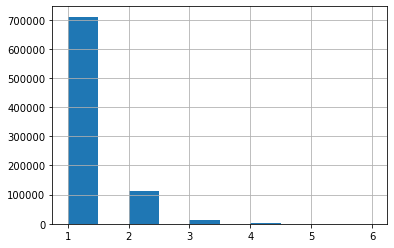

In [11]:
data.groupby('CustomerID').TransactionID.count().hist()

In [12]:
transPerCust = data.groupby('CustomerID').count()

In [13]:
transPerCust.head(10)

,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
CustomerID,,,,,,,,
C1010011,2,2,2,2,2,2,2,2
C1010012,1,1,1,1,1,1,1,1
C1010014,2,2,2,2,2,2,2,2
C1010018,1,1,1,1,1,1,1,1
C1010024,1,1,1,1,1,1,1,1
C1010028,1,1,1,1,1,1,1,1
C1010031,2,2,2,2,2,2,2,2
C1010035,2,2,2,2,2,2,2,2
C1010036,1,1,1,1,1,1,1,1


In [14]:
data.groupby('CustomerID').TransactionID.count().sort_values()

CustomerID
C5031144    1
C6142728    1
C6142735    1
C6142737    1
C6142746    1
           ..
C1026833    6
C6735477    6
C6624352    6
C1736254    6
C3226689    6
Name: TransactionID, Length: 839081, dtype: int64

In [15]:
data[data.CustomerID == 'C3226689']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
19882,T19883,C3226689,1990-01-01,M,BASTI,11369.40,2016-09-26,13:13:42,200.00
35613,T35614,C3226689,1987-09-15,M,NOIDA,96820.46,2016-09-30,14:50:16,418.00
218661,T218662,C3226689,1984-04-11,F,NEW DELHI,1667.83,2016-08-08,19:02:33,4700.00
756541,T756542,C3226689,1972-09-17,M,SHARJAH,588826.94,2016-01-09,16:55:54,6351.39
836123,T836124,C3226689,1977-07-20,M,THANE,369.36,2016-04-09,13:46:45,1749.00
984048,T984049,C3226689,1985-05-21,M,GURGAON,12977.22,2016-09-15,19:59:29,1340.00


There is a mistake here .....
- we have 6 transactions with the same customer ID but different date of birth and different gender

- We should explore it more
.......

# MinHash

Choosing the features to characterize a single customer